In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [86]:
data = pd.read_csv('train.csv')
data.dropna(subset=['SalePrice'], inplace=True)

train, test = train_test_split(data, test_size=0.3, random_state=42)
print(f'{len(train)+len(test)} in dataset: {len(train)} in training set, {len(test)} in test set')
train.head(10)

1460 in dataset: 1022 in training set, 438 in test set


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
135,136,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal,174000
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
762,763,60,FV,72.0,8640,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,Con,Normal,215200
932,933,20,RL,84.0,11670,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,320000
435,436,60,RL,43.0,10667,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,ConLw,Normal,212000
629,630,80,RL,82.0,9020,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2008,WD,Normal,168500
1210,1211,60,RL,70.0,11218,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,400,5,2010,WD,Normal,189000
1118,1119,80,RL,85.0,13825,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,140000
1084,1085,60,RL,NaN,13031,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,187500
158,159,60,FV,100.0,12552,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2010,WD,Normal,254900


In [87]:
# normalize the numeric features
numeric_features = train.select_dtypes(include=[np.number])
numeric_features = numeric_features.drop(columns=['Id', 'SalePrice'])
numeric_features = (numeric_features - numeric_features.mean()) / numeric_features.std()
numeric_features = numeric_features.fillna(0)
numeric_features = numeric_features.join(train['SalePrice'])
print(numeric_features.head(10))

      MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
135    -0.868524     0.376954 -0.030489     0.635719     0.392074  -0.032362   
1452    2.881208    -1.385429 -0.624059    -0.822654    -0.508375   1.105893   
762     0.068909     0.063642 -0.185833     0.635719    -0.508375   1.235979   
932    -0.868524     0.533610  0.081605     2.094093    -0.508375   1.138414   
435     0.068909    -1.072116 -0.006923     0.635719     0.392074   0.813199   
629     0.537625     0.455282 -0.152293    -0.093467    -0.508375  -0.227492   
1210    0.068909    -0.014687  0.041710    -0.093467    -0.508375   0.683112   
1118    0.537625     0.572775  0.271812    -0.822654     0.392074  -0.422621   
1084    0.068909     0.000000  0.201731    -0.093467    -0.508375   0.780677   
158     0.068909     1.160236  0.159453     0.635719    -0.508375   1.073371   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
135      -0.711296    1.058082   -0.970009  

<Axes: xlabel='YrSold'>

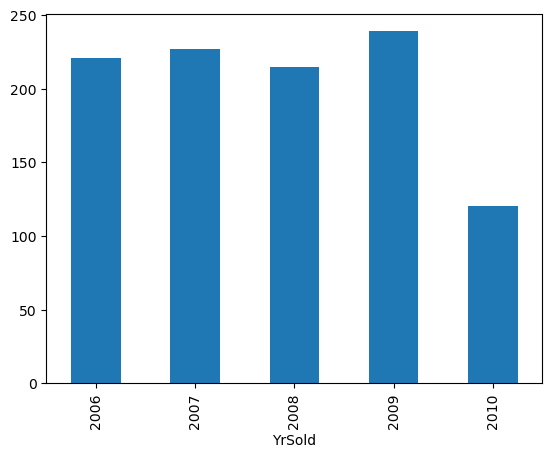

In [88]:
train['YrSold'].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='YrSold', ylabel='SalePrice'>

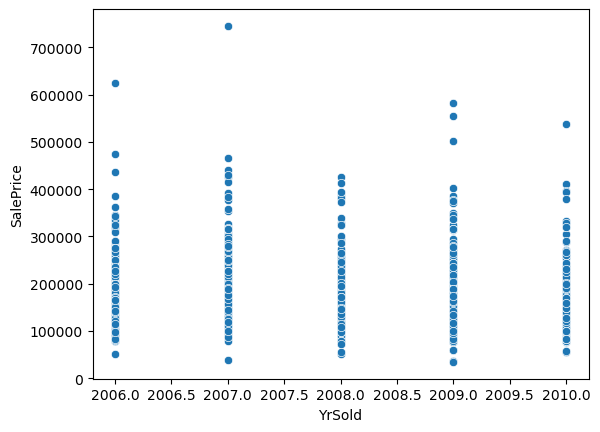

In [89]:
sns.scatterplot(x='YrSold', y='SalePrice', data=train)

<Axes: xlabel='YrSold'>

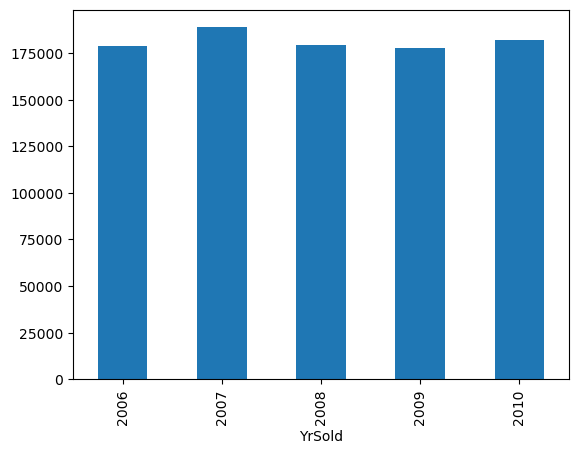

In [90]:
# plot the average sale price per year
train.groupby('YrSold')['SalePrice'].mean().plot(kind='bar')

<Axes: >

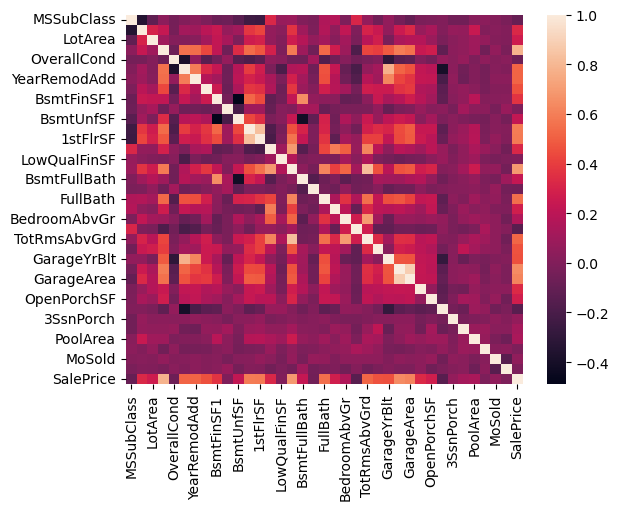

In [91]:
# plot the correlation matrix of numeric features
corr = numeric_features.corr()
sns.heatmap(corr)

In [92]:
# print the highest correlated features
print(corr['SalePrice'].sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.784720
GrLivArea        0.689238
GarageCars       0.642689
GarageArea       0.621937
TotalBsmtSF      0.590017
1stFlrSF         0.583132
FullBath         0.549164
TotRmsAbvGrd     0.519634
YearBuilt        0.512206
YearRemodAdd     0.512190
Fireplaces       0.461329
GarageYrBlt      0.457435
MasVnrArea       0.454340
BsmtFinSF1       0.360559
WoodDeckSF       0.331151
LotFrontage      0.320437
2ndFlrSF         0.314904
HalfBath         0.278889
OpenPorchSF      0.277547
LotArea          0.262896
BsmtFullBath     0.228331
BsmtUnfSF        0.223321
BedroomAbvGr     0.159879
PoolArea         0.138324
ScreenPorch      0.119974
3SsnPorch        0.059417
MoSold           0.048494
LowQualFinSF    -0.002201
BsmtFinSF2      -0.009665
YrSold          -0.012761
MiscVal         -0.016525
BsmtHalfBath    -0.052806
OverallCond     -0.071461
MSSubClass      -0.094099
KitchenAbvGr    -0.146972
EnclosedPorch   -0.147502
Name: SalePrice, dtype: float64


<Axes: >

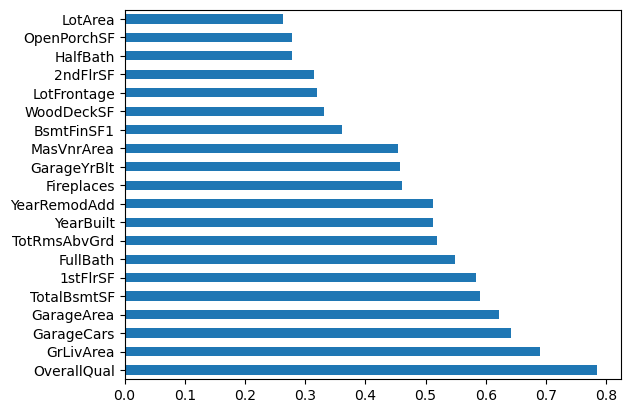

In [93]:
# plot the features with the highest sale price correlation as a bar plot
corr['SalePrice'].drop(['SalePrice']).sort_values(ascending=False).head(20).plot(kind='barh')